# Food Inspection - Exploratory Data Analysis

## Exercise 1

### Step 1.1

In [42]:
#Importing all required libraries
import pandas as pd
from pandas import DataFrame as df
import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [43]:
#Reading in the data from csv file
food = pd.read_csv("Food_Inspection.csv")
#Preview of data
food.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Food from Approved Source (C),Food Protected from Contamination (C),...,Nutritional Labeling,Trans Fat Ban,No-Smoking Sign Posted,Inspection Type,Owner,Category,Type,Latitude,Longitude,Location
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,"P. N. ENTERPRISES, LLC",Restaurant,Food,39.1179,-77.2524,"(39.1179, -77.2524)"
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"GIANT OF MARYLAND, LLC",Market,Food,39.1551,-77.1659,"(39.1551, -77.1659)"
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,K.M.MG INC,Restaurant,Food,38.9853,-77.0273,"(38.9853, -77.0273)"
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,12/13/2017,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"OLNEY GT, LLC.",Restaurant,Food,39.1519,-77.0619,"(39.1519, -77.0619)"
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,12/13/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,CRAVE RESTAURANT BETHESDA LLC,Restaurant,Food,39.0221,-77.1471,"(39.0221, -77.1471)"


In [44]:
#Creating a copy of original dataframe with all data
food1 = food.copy()
food1.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Food from Approved Source (C),Food Protected from Contamination (C),...,Nutritional Labeling,Trans Fat Ban,No-Smoking Sign Posted,Inspection Type,Owner,Category,Type,Latitude,Longitude,Location
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,"P. N. ENTERPRISES, LLC",Restaurant,Food,39.1179,-77.2524,"(39.1179, -77.2524)"
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"GIANT OF MARYLAND, LLC",Market,Food,39.1551,-77.1659,"(39.1551, -77.1659)"
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,K.M.MG INC,Restaurant,Food,38.9853,-77.0273,"(38.9853, -77.0273)"
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,12/13/2017,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"OLNEY GT, LLC.",Restaurant,Food,39.1519,-77.0619,"(39.1519, -77.0619)"
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,12/13/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,CRAVE RESTAURANT BETHESDA LLC,Restaurant,Food,39.0221,-77.1471,"(39.0221, -77.1471)"


In [45]:
#Checking value counts of "category"
food.Category.value_counts()

Restaurant                   7736
Market                       2773
Public School- Elementary     571
Carry Out                     301
Caterer                       233
Snack Bar                     209
Public School- Middle         166
Assisted Living               159
Private School                150
Nursing Home                  126
Non-Profit                    115
Public School- High           113
Institution                    63
Hospital                       39
Seasonal                       23
Public School- Other           21
Farmers Market                 17
Excluded Organization          11
Mobile Unit                     4
Name: Category, dtype: int64

#### Values representing a restaurant - Restaurant, Carry Out, Snack Bar

In [46]:
#Replacing the above chosen categories with "Restaurant"
food = food.replace(to_replace = ["Carry Out", "Snack Bar"], value = "Restaurant")

#Checking value counts of "Category" again to ensure appropriate categories have been replaced
food.Category.value_counts()

Restaurant                   8246
Market                       2773
Public School- Elementary     571
Caterer                       233
Public School- Middle         166
Assisted Living               159
Private School                150
Nursing Home                  126
Non-Profit                    115
Public School- High           113
Institution                    63
Hospital                       39
Seasonal                       23
Public School- Other           21
Farmers Market                 17
Excluded Organization          11
Mobile Unit                     4
Name: Category, dtype: int64

In [47]:
#creating dummy variables for "Category"
food = pd.get_dummies(food, columns = ["Category"])

#Dropping dummy categories other than for "Restaurant"
for column in food.iloc[:, 30:]:
    if column == "Category_Restaurant":
        pass
    else:
        food = food.drop(columns = column, axis = 1)
food.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Food from Approved Source (C),Food Protected from Contamination (C),...,Nutritional Labeling,Trans Fat Ban,No-Smoking Sign Posted,Inspection Type,Owner,Type,Latitude,Longitude,Location,Category_Restaurant
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,"P. N. ENTERPRISES, LLC",Food,39.1179,-77.2524,"(39.1179, -77.2524)",1
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"GIANT OF MARYLAND, LLC",Food,39.1551,-77.1659,"(39.1551, -77.1659)",0
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,K.M.MG INC,Food,38.9853,-77.0273,"(38.9853, -77.0273)",1
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,12/13/2017,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"OLNEY GT, LLC.",Food,39.1519,-77.0619,"(39.1519, -77.0619)",1
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,12/13/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,CRAVE RESTAURANT BETHESDA LLC,Food,39.0221,-77.1471,"(39.0221, -77.1471)",1


### Step 1.2

In [48]:
#Converting "Inspection Date" to datetime data type
food["Inspection Date"] = pd.to_datetime(food["Inspection Date"])
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13701 entries, 0 to 13700
Data columns (total 31 columns):
Establishment ID                           13701 non-null int64
Name                                       13701 non-null object
Address 1                                  13701 non-null object
Address 2                                  926 non-null object
City                                       13701 non-null object
Zip                                        13701 non-null int64
Inspection Date                            13701 non-null datetime64[ns]
Inspection Results                         13701 non-null object
Food from Approved Source (C)              13701 non-null object
Food Protected from Contamination (C)      13701 non-null object
Ill Workers Restricted (C)                 13701 non-null object
Proper Hand Washing (C)                    13701 non-null object
Cooling Time and Temperature (C)           13701 non-null object
Cold Holding Temperature (C)              

In [49]:
#Extracting year, month and month-year as new columns from "Inspection Date" 
food["Inspection Year"] = pd.DatetimeIndex(food["Inspection Date"]).year
food["Inspection Month"] = pd.DatetimeIndex(food["Inspection Date"]).month
food["Inspection Month Year"] = pd.to_datetime(food["Inspection Date"]).dt.to_period("M")
food = food.replace("Not applicable", np.nan)
food.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Food from Approved Source (C),Food Protected from Contamination (C),...,Inspection Type,Owner,Type,Latitude,Longitude,Location,Category_Restaurant,Inspection Year,Inspection Month,Inspection Month Year
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,2018-12-19,No Critical Violations Noted,In Compliance,In Compliance,...,Monitoring,"P. N. ENTERPRISES, LLC",Food,39.1179,-77.2524,"(39.1179, -77.2524)",1,2018,12,2018-12
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,2018-12-19,Critical Violations Corrected,In Compliance,In Compliance,...,Comprehensive,"GIANT OF MARYLAND, LLC",Food,39.1551,-77.1659,"(39.1551, -77.1659)",0,2018,12,2018-12
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,2018-12-19,No Critical Violations Noted,In Compliance,In Compliance,...,Monitoring,K.M.MG INC,Food,38.9853,-77.0273,"(38.9853, -77.0273)",1,2018,12,2018-12
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,2017-12-13,No Critical Violations Noted,In Compliance,In Compliance,...,Comprehensive,"OLNEY GT, LLC.",Food,39.1519,-77.0619,"(39.1519, -77.0619)",1,2017,12,2017-12
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,2018-12-13,No Critical Violations Noted,In Compliance,In Compliance,...,Monitoring,CRAVE RESTAURANT BETHESDA LLC,Food,39.0221,-77.1471,"(39.0221, -77.1471)",1,2018,12,2018-12


### Step 1.3

In [50]:
#Creating dummy varibles for each Type of Violation
#adding dummy_na as parameter to indicate columns where n/a values are present
col = food.columns[8:24]
food = pd.get_dummies(food, columns = col, drop_first = True)
food.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,Owner,...,Cold Holding Temperature (C)_Out of Compliance,Hot Holding Temperature (C)_Out of Compliance,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,2018-12-19,No Critical Violations Noted,Monitoring,"P. N. ENTERPRISES, LLC",...,0,0,0,0,0,0,0,0,0,0
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,2018-12-19,Critical Violations Corrected,Comprehensive,"GIANT OF MARYLAND, LLC",...,1,0,0,0,0,0,0,0,0,0
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,2018-12-19,No Critical Violations Noted,Monitoring,K.M.MG INC,...,0,0,0,0,0,0,0,0,0,0
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,2017-12-13,No Critical Violations Noted,Comprehensive,"OLNEY GT, LLC.",...,0,0,0,0,0,0,0,0,0,0
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,2018-12-13,No Critical Violations Noted,Monitoring,CRAVE RESTAURANT BETHESDA LLC,...,0,0,0,0,0,0,0,1,0,0


### Step 1.4

In [51]:
#Creating new column "Number of Violations" as sum of all dummy varible columns for type of violation. 
#Since dummy categories have only 1/0 values, number of violations = sum of all rows for dummy categories
#Creating a new category "Non-Compliant" which has value 1 if the restuarant has any violation 
#(for the particular inspection) and has value 0 if the entry has no violation for the particular inspection
col1 = food.columns[18:32]
food["Number of Violations"] = food[col1].sum(axis = 1)
food["Non-Compliant"] = (food["Number of Violations"] > 0).astype(int)
food.head()

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,Owner,...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,2018-12-19,No Critical Violations Noted,Monitoring,"P. N. ENTERPRISES, LLC",...,0,0,0,0,0,0,0,0,0,0
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,2018-12-19,Critical Violations Corrected,Comprehensive,"GIANT OF MARYLAND, LLC",...,0,0,0,0,0,0,0,0,3,1
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,2018-12-19,No Critical Violations Noted,Monitoring,K.M.MG INC,...,0,0,0,0,0,0,0,0,0,0
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,2017-12-13,No Critical Violations Noted,Comprehensive,"OLNEY GT, LLC.",...,0,0,0,0,0,0,0,0,0,0
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,2018-12-13,No Critical Violations Noted,Monitoring,CRAVE RESTAURANT BETHESDA LLC,...,0,0,0,0,0,1,0,0,1,1


### Step 1.5

In [52]:
#Merging above dataframe(food) with copy of original dataframe (food1) to get category values back in the new dataframe
#as newdf
newdf = food1.merge(food, left_index = True, right_index = True)
newdf.head()

,Establishment ID_x,Name_x,Address 1_x,Address 2_x,City_x,Zip_x,Inspection Date_x,Inspection Results_x,Food from Approved Source (C),Food Protected from Contamination (C),...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,0,0,0,0,0,0,0,0,0,0
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,0,0,0,0,0,0,0,0,3,1
2,20933,PIZZA BOLIS,7831 EASTERN AVE.,NaN,SILVER SPRING,20910,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,0,0,0,0,0,0,0,0,0,0
3,22217,GREENE TURTLE,18101 TOWN CENTER DR,NaN,OLNEY,20832,12/13/2017,No Critical Violations Noted,In Compliance,In Compliance,...,0,0,0,0,0,0,0,0,0,0
4,28408,CRAVE,7101 DEMOCRACY BLVD,SPACE #FC,BETHESDA,20817,12/13/2018,No Critical Violations Noted,In Compliance,In Compliance,...,0,0,0,0,0,1,0,0,1,1


In [53]:
#Extracting required columns from newdf as ins
ins = newdf[["Establishment ID_x", "Category","Inspection Date_x","Number of Violations"]]

#Extracting only restaurants with multiple inspections 
ins = ins[ins.duplicated("Establishment ID_x", keep= False)]
ins = ins.sort_values(by = "Establishment ID_x")

#Converting date to datetime format
ins["Inspection Date_x"] = pd.to_datetime(ins["Inspection Date_x"])
ins = ins.sort_values(by=["Establishment ID_x", "Inspection Date_x"], ascending = True).reset_index()
ins.head()

,index,Establishment ID_x,Category,Inspection Date_x,Number of Violations
0,12133,11,Market,2017-11-08,2
1,39,11,Market,2018-12-14,1
2,89,11,Market,2018-12-21,0
3,1857,12,Market,2018-01-23,0
4,8918,12,Market,2018-07-13,1


In [54]:
#Changing from long to wide format using groupby and pivot to create new dataframe "violations"
#ins_count is the inspection number (0 for 1st inspection, 1 for 2nd inspection etc)
#Values represent number of violations for each inspection for each restaurant
ins["ins_count"]=ins.groupby("Establishment ID_x").cumcount()
violations = ins.pivot(index = "Establishment ID_x", columns = "ins_count")[["Number of Violations"]]
violations.head()

Number of Violations                                       \
ins_count                            0    1    2    3    4    5   6   7   8    
Establishment ID_x                                                             
11                                  2.0  1.0  0.0  NaN  NaN  NaN NaN NaN NaN   
12                                  0.0  1.0  0.0  NaN  NaN  NaN NaN NaN NaN   
21                                  1.0  1.0  NaN  NaN  NaN  NaN NaN NaN NaN   
26                                  2.0  1.0  NaN  NaN  NaN  NaN NaN NaN NaN   
28                                  0.0  0.0  0.0  1.0  1.0  0.0 NaN NaN NaN   

                                                    
ins_count           9   10  11  12  13  14  15  16  
Establishment ID_x                                  
11                 NaN NaN NaN NaN NaN NaN NaN NaN  
12                 NaN NaN NaN NaN NaN NaN NaN NaN  
21                 NaN NaN NaN NaN NaN NaN NaN NaN  
26                 NaN NaN NaN NaN NaN NaN NaN NaN  
28                 NaN NaN NaN NaN NaN NaN NaN NaN

In [55]:
#Changing ins dataframe from long to wide format using groupby and pivot to create new dataframe "date"
#ins_count is the inspection number (0 for 1st inspection, 1 for 2nd inspection etc)
#Values represent date of inspection for each inspection for each restaurant
date = ins.pivot(index = "Establishment ID_x", columns = "ins_count")[["Inspection Date_x"]]
date.head()

Inspection Date_x                                   \
ins_count                         0          1          2          3    
Establishment ID_x                                                      
11                        2017-11-08 2018-12-14 2018-12-21        NaT   
12                        2018-01-23 2018-07-13 2019-01-15        NaT   
21                        2017-10-17 2018-08-20        NaT        NaT   
26                        2017-10-11 2018-12-18        NaT        NaT   
28                        2017-10-05 2018-02-26 2018-04-13 2018-10-22   

                                                                              \
ins_count                  4          5   6   7   8   9   10  11  12  13  14   
Establishment ID_x                                                             
11                        NaT        NaT NaT NaT NaT NaT NaT NaT NaT NaT NaT   
12                        NaT        NaT NaT NaT NaT NaT NaT NaT NaT NaT NaT   
21                        NaT        NaT NaT NaT NaT NaT NaT NaT NaT NaT NaT   
26                        NaT        NaT NaT NaT NaT NaT NaT NaT NaT NaT NaT   
28                 2019-06-18 2019-08-02 NaT NaT NaT NaT NaT NaT NaT NaT NaT   

                            
ins_count           15  16  
Establishment ID_x          
11                 NaT NaT  
12                 NaT NaT  
21                 NaT NaT  
26                 NaT NaT  
28                 NaT NaT

In [56]:
#Merging the above 2 dataframes to get date and number of violations for each inspection of each restaurant
frames = [date,violations]
df = pd.concat(frames)
df.head()

Inspection Date_x                                   \
ins_count                         0          1          2          3    
Establishment ID_x                                                      
11                        2017-11-08 2018-12-14 2018-12-21        NaT   
12                        2018-01-23 2018-07-13 2019-01-15        NaT   
21                        2017-10-17 2018-08-20        NaT        NaT   
26                        2017-10-11 2018-12-18        NaT        NaT   
28                        2017-10-05 2018-02-26 2018-04-13 2018-10-22   

                                                          ...  \
ins_count                  4          5   6   7   8   9   ...   
Establishment ID_x                                        ...   
11                        NaT        NaT NaT NaT NaT NaT  ...   
12                        NaT        NaT NaT NaT NaT NaT  ...   
21                        NaT        NaT NaT NaT NaT NaT  ...   
26                        NaT        NaT NaT NaT NaT NaT  ...   
28                 2019-06-18 2019-08-02 NaT NaT NaT NaT  ...   

                   Number of Violations                                      
ins_count                            7   8   9   10  11  12  13  14  15  16  
Establishment ID_x                                                           
11                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
12                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
21                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
26                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
28                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 34 columns]

## Exercise 2

### Step 2.1

In [57]:
#Number of violations by type
viol_df = food[col1]
viol_df = pd.DataFrame(viol_df.sum(axis = 0), columns = ["Total"]).sort_values("Total", ascending = False)
viol_df

,Total
Cold Holding Temperature (C)_Out of Compliance,2702
Rodent and Insects_Out of Compliance,1992
Hot Holding Temperature (C)_Out of Compliance,925
Food Protected from Contamination (C)_Out of Compliance,575
Proper Hand Washing (C)_Out of Compliance,524
Trans Fat Ban_Out of Compliance,289
Cooling Time and Temperature (C)_Out of Compliance,219
Hot and Cold Running Water Provided (C)_Out of Compliance,113
Reheating Time and Temperature (C)_Out of Compliance,84
Food from Approved Source (C)_Out of Compliance,69


#### Most common type of violation is "Cold Holding Temperature". 

### Step 2.2

In [58]:
#Creating new dataframe from violations with only those restaurants that have at least 1 violation 
violations1 = violations[violations.sum(axis = 1) != 0]

In [59]:
#Creating empty dataframe in the required format
#filling all values as 0
columns = ["Never Compliant"]
index = []
for i in range(1,17):
    columns = columns + ["Compliant After " + str(i) + " Reinspections"]
for i in range(2,18):
    index = index + [str(i) + " Inspections"]

df2 = pd.DataFrame(index = index, columns = columns)

df2 = df2.fillna(0)

#Function used for splicing of multiindex dataframe 
idx = pd.IndexSlice

#List of all establishment IDs with more than 1 violation (from index of violations1 dataframe)
estid = list(violations1.index)

#Looping over the violations1 dataframe, starting with each row (Establishment ID)
#Within each row, looping over all 17 columns starting from end (17 to 0)
#Pass for all NaN values
#First non-NaN value gives the last inspection for a restaurant
#Calculate row value as r from this (it will be equal to the (inspection count - 1) -- eg: for first non-value at "inspection count = 3"
#we need to add 1 to row 2 - "3 Inspections" of new dataframe)
#If it has violation count > 0, add to first column - "Never Compliant" of new dataframe 
#If it is non-0, could be the first 0 or last 0
#To check the first 0, sum all violations and as sum >0, find the inspection count to calculate column value of new dataframe
#where we need to increase count by 1

for i in estid[:]:
    sum1 = 0
    r=0
    k=0
    for j in range(16,0,-1):
        v = violations1.loc[i,idx[:,j]][0]
        if np.isnan(v):
            pass
        else:
            r = j-1
            if violations1.loc[i,idx[:,j]][0] != 0:
                df2.iat[r,0] = df2.iat[r,0] + 1
                break
            else:
                sum1=0
                if j == 1 and violations1.loc[i,idx[:,0]][0] != 0:
                    df2.iat[r,1] = df2.iat[r,1] + 1
                    break
                else:
                    for k in range(j,-1,-1):
                        sum1 = sum1 + violations1.loc[i,idx[:,k]][0]
                        if sum1 > 0:
                            df2.iat[r,k+1] = df2.iat[r,k+1] + 1
                            break                    
                break
                
#Adding row and column totals
df2.loc[:,"Total"] = df2.sum(axis = 1)
df2.loc["Total",:] = df2.sum(axis = 0)
df2

,Never Compliant,Compliant After 1 Reinspections,Compliant After 2 Reinspections,Compliant After 3 Reinspections,Compliant After 4 Reinspections,Compliant After 5 Reinspections,Compliant After 6 Reinspections,Compliant After 7 Reinspections,Compliant After 8 Reinspections,Compliant After 9 Reinspections,Compliant After 10 Reinspections,Compliant After 11 Reinspections,Compliant After 12 Reinspections,Compliant After 13 Reinspections,Compliant After 14 Reinspections,Compliant After 15 Reinspections,Compliant After 16 Reinspections,Total
2 Inspections,213.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338.0
3 Inspections,235.0,90.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448.0
4 Inspections,292.0,76.0,98.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0
5 Inspections,224.0,30.0,36.0,56.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
6 Inspections,124.0,12.0,9.0,14.0,30.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0
7 Inspections,52.0,1.0,4.0,5.0,11.0,15.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
8 Inspections,28.0,0.0,0.0,0.0,2.0,2.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
9 Inspections,11.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
10 Inspections,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
11 Inspections,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


#### Observations:
##### Maximum number of establishments are in the never compliant category. 
##### Most establishments have had 4 Inspections and there are very few restaurants that have had more than 8 inspections. 
#### Most of the establishments become compliant in the inspection just before the last inspection. This could indicate that most establishments are not inspected after they are found to be compliant. (This doesn't take into consideration the establishments that were always compliant since the first inspection and were still continued to be inspected.) 
##### For most establishments (less than 4 inspections), maximum proportion of restaurants that become compliant after resinpections do so after either 1,2 or 3 inspections. 

## Exercise 3

### Step 3.1

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Total of Violations by Type')

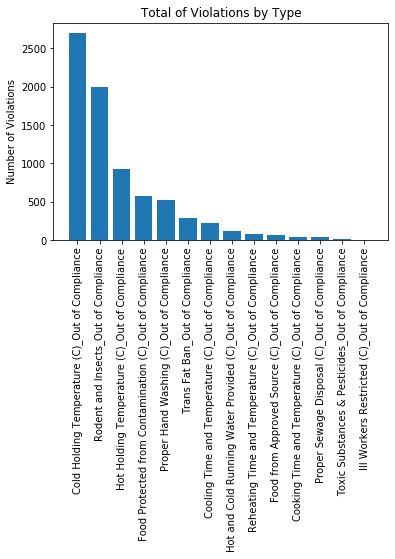

In [60]:
#Plotting bar graph from 2.1
%pylab inline
import matplotlib.pyplot as plt 
plt.bar(x=viol_df.index, height = viol_df.Total)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Violations')
plt.title('Total of Violations by Type')

### Step 3.2

In [61]:
#Selecting only restaurant category for further analysis
res = food.loc[food["Category_Restaurant"] == 1]

#copy of res as res1 to be used for step 3.3
res1 = res.copy()
res1 = res1.set_index('Establishment ID')

In [62]:
#Extracting required columns
temp = res[["Inspection Month Year", "Non-Compliant"]]

#Grouping by Month-year 
#Calculating the count of "Non-Compliant" dummy variable, count = total number of restaurants inspected in that month-year
#Calculating the sum of "Non-Compliant" dummy variable, sum = number of restaurants with at least one violation from the restaurants inspected in that month-year
#Merging both to get dataframe with both columns
#Dividing sum/count to get percentage
temp1 = temp.groupby("Inspection Month Year").agg({"Non-Compliant":sum})
temp2 = temp.groupby("Inspection Month Year").agg({"Non-Compliant":"count"})
comp = temp2.merge(temp1, left_index = True, right_index = True)
comp.columns = ["Total Inspections", "Non-Compliance Cases"]
comp["Percent"] = (comp["Non-Compliance Cases"]/comp["Total Inspections"])*100

#converting month-year to timestamp
comp.index = comp.index.to_timestamp()
comp.head()

,Total Inspections,Non-Compliance Cases,Percent
Inspection Month Year,,,
2017-09-01,393,225,57.251908
2017-10-01,410,206,50.243902
2017-11-01,404,188,46.534653
2017-12-01,408,187,45.833333
2018-01-01,484,204,42.148760


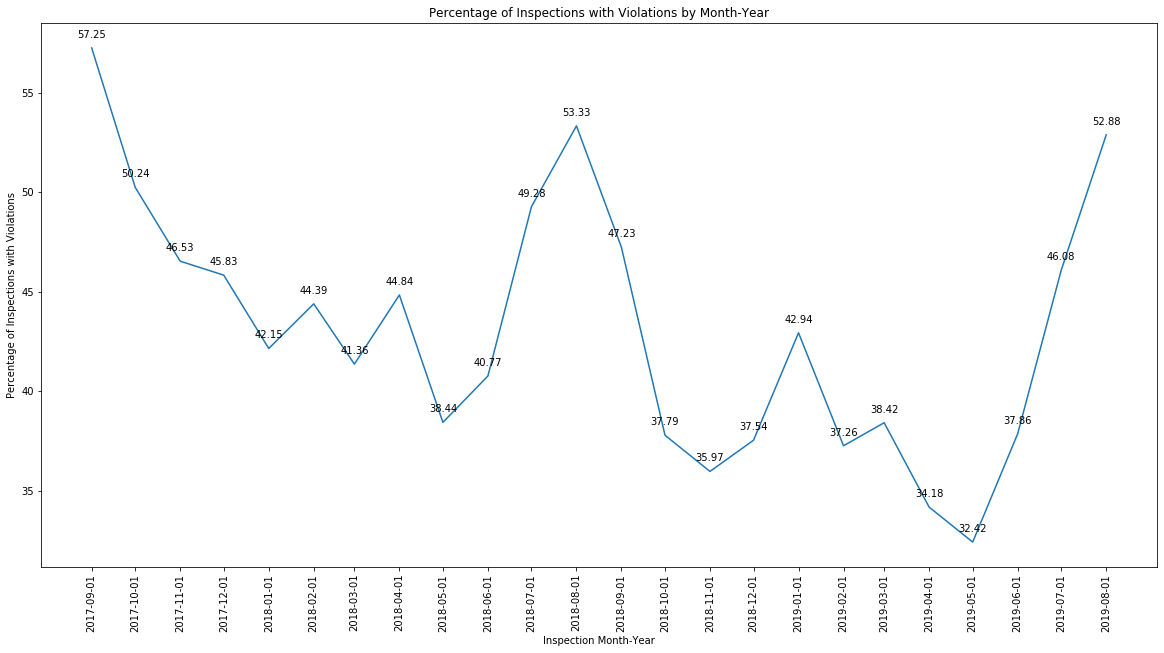

In [63]:
#Plotting month-year by percentage of inspections with violations in that month-year
#Formatting graph to add labels, title
plt.figure(figsize = (20,10))
x=comp.index
y=comp["Percent"]
plt.plot(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Inspection Month-Year')
plt.ylabel('Percentage of Inspections with Violations')
plt.title('Percentage of Inspections with Violations by Month-Year')
plt.xticks(x)
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.show()


#### Observations:
##### There appears to be a seasonality pattern/trend in the percent of inspections with violations over month-year. 
##### Overall there is a decreasing trend in percentage of non-compliant restaurants but with occassional peaks. 
##### Percentage of restaurants that are non-compliant is found to be particularly high in the August-September months (for both 2018 and 2019) and the percentage seems to be very low for the month of May (across both years 2018 and 2019). 
##### This could be because of change in seasons. September-October is considered the harvest period, which might lead to inadequate storage of food items due to greter influx etc, leading to higher chances of violations for restaurants. There are also a lot of sporting events in October, leading to more crowd in restaurants, which further could lead to more chances of violations. 

### Step 3.3

In [64]:
#Using res1 defined above and Grouping by establishment ID, then finding sum of non-compliant cases
#Since non-compliant is dummy variable, if sum of non-compliant > 0, restaurant has had at least one violation
#Merging with res1 to get other categories (lat, long etc)
#Creating datafrme - "non-comp" which are restaurants within category restaurant that have had at least one violation
all1 = res1.groupby("Establishment ID").agg({"Non-Compliant": sum}).reset_index()
non = all1.loc[all1["Non-Compliant"] != 0]
non = non.set_index("Establishment ID")
non_comp = non.merge(res1, left_index = True, right_index = True).reset_index()
non_comp = non_comp.drop_duplicates("Establishment ID")
non_comp.head()

,Establishment ID,Non-Compliant_x,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant_y
0,60,3,7-ELEVEN #29912,15900 SHADY GROVE RD.,NaN,GAITHERSBURG,20877,2019-06-06,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,1,0,0,3,1
6,63,1,A & J RESTAURANT,1319-B ROCKVILLE PK.,NaN,ROCKVILLE,20852,2018-01-18,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,0,0,0,1,1
8,71,3,ACAJUTLA RESTAURANT,18554 WOODFIELD RD.,NaN,GAITHERSBURG,20879,2018-02-07,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,0,0,0,0,0
14,83,2,AJI-NIPPON RESTAURANT,6937 ARLINGTON RD.,NaN,BETHESDA,20814,2019-04-09,No Critical Violations Noted,Comprehensive,...,0,0,0,0,0,0,0,0,0,0
18,127,1,ARMAND'S CHICAGO PIZZERIA,1909 SEMINARY RD.,NaN,SILVER SPRING,20910,2018-03-12,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,1,0,0,1,1


In [65]:
#If sum of non-compliant summy variable for a restarant = 0, restaurant has always been compliant
#Creating datafrme - "al-comp" which are restaurants within category restaurant that have had no violations
comp3 = all1.loc[all1["Non-Compliant"] == 0]
comp3 = comp3.set_index("Establishment ID")
al_comp = comp3.merge(res1, left_index = True, right_index = True).reset_index()
al_comp = al_comp.drop_duplicates("Establishment ID")
al_comp.head()

,Establishment ID,Non-Compliant_x,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant_y
0,91,0,AMALFI RISTORANTE,12307 WILKINS AVE.,NaN,ROCKVILLE,20852,2018-01-25,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,0,0,0,0,0
3,98,0,AMERICAN LEGION #268,11225 FERN ST.,NaN,WHEATON,20902,2018-12-27,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,0,0,0,0,0
6,99,0,AMERICAN LEGION #041,905 SLIGO AVE.,NaN,SILVER SPRING,20910,2018-10-30,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,0,0,0,0,0
9,124,0,ARGYLE COUNTRY CLUB,14600 ARGYLE CLUB RD.,NaN,SILVER SPRING,20906,2018-05-07,No Critical Violations Noted,Pre-Opening - Environmental,...,0,0,0,0,0,0,0,0,0,0
10,135,0,ASBURY VILLAGE APTS.,405 RUSSELL AVE.,NaN,GAITHERSBURG,20877,2017-12-20,No Critical Violations Noted,Comprehensive,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Plotting restaurants that were always compliant and those that had at least one violation by location on map
#using mapbox for layout
#al_comp is marked in green and non_comp in red
mapbox_access_token = 'pk.eyJ1Ijoic2hydXRoaTI3IiwiYSI6ImNrMnAydDV4djBod2ozbnFxcmY1Y3U0MncifQ.XtO8AEoBS5QEIYm9rp38NA'
res_map_data = (go.Scattermapbox(
        lon = al_comp['Longitude'],
        lat = al_comp['Latitude'],
        text = al_comp['Establishment ID'],
        hoverinfo='text',
        mode = 'markers',
        name = "Restaurants with No Violations",
        marker = dict(
                    color = 'green',
                    symbol = 'circle',
                    opacity = .5 
                )),
    go.Scattermapbox(
        lon = non_comp['Longitude'],
        lat = non_comp['Latitude'],
        text = non_comp['Establishment ID'],
        hoverinfo='text',
        mode = 'markers',
        name = "Restaurants with Violations",
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5 
                )))

res_map_layout = go.Layout(
        title = 'Restaurant Inspections',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
            )
)

res_map = go.Figure(data=res_map_data, layout=res_map_layout)
res_map.show()

#### Observations:
##### Clusters of violations are especially found in main cities (Silver Spring, Rockville, Bethesda). 
##### Restaurants that are always compliant are more spread across the state and are usually away from main cities. 
##### Cluster of violations in cities could be because the restaurants in cities are more crowded as compared to countryside restaurants. More crowd leads to more chances of violations due to increased need for quick and frequent cleaning. 
##### Size of restaurants is also usually bigger in cities as compared to countryside where smaller restaurant chains are usually found. This could further lead to increased violations as larger the restaurant, more difficult is the maintenance and cleaning.


In [67]:
#Filtering out dataframe with "Cold Holding Temperature" violation (among restaurants with at least 1 violation.)
cold = non_comp.loc[non_comp["Cold Holding Temperature (C)_Out of Compliance"] == 1]
cold.head()

,Establishment ID,Non-Compliant_x,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant_y
0,60,3,7-ELEVEN #29912,15900 SHADY GROVE RD.,NaN,GAITHERSBURG,20877,2019-06-06,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,1,0,0,3,1
6,63,1,A & J RESTAURANT,1319-B ROCKVILLE PK.,NaN,ROCKVILLE,20852,2018-01-18,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,0,0,0,1,1
22,157,3,ATHENS GRILL,9124 ROTHBURY DR.,NaN,GAITHERSBURG,20886,2018-01-24,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,0,0,0,1,1
32,183,3,BAGEL CITY,12119 ROCKVILLE PK.,NaN,ROCKVILLE,20852,2018-03-27,Critical Violations Corrected,Complaint Invest w/Comprehensive,...,0,0,0,0,0,0,0,0,2,1
36,251,4,BETHESDA BAGELS,4819 BETHESDA AVE.,NaN,BETHESDA,20814,2018-12-21,Critical Violations Corrected,Comprehensive,...,0,0,0,0,0,1,0,0,4,1


In [68]:
#Filtering out dataframe with "Rodent and Insects" violation (among restaurants with at least 1 violation.)
rodent = non_comp.loc[non_comp["Rodent and Insects_Out of Compliance"] == 1]
rodent.head()

,Establishment ID,Non-Compliant_x,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Inspection Type,...,Cooking Time and Temperature (C)_Out of Compliance,Reheating Time and Temperature (C)_Out of Compliance,Hot and Cold Running Water Provided (C)_Out of Compliance,Proper Sewage Disposal (C)_Out of Compliance,Toxic Substances & Pesticides_Out of Compliance,Rodent and Insects_Out of Compliance,Trans Fat Ban_Out of Compliance,No-Smoking Sign Posted_Out of Compliance,Number of Violations,Non-Compliant_y
0,60,3,7-ELEVEN #29912,15900 SHADY GROVE RD.,NaN,GAITHERSBURG,20877,2019-06-06,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,1,0,0,3,1
18,127,1,ARMAND'S CHICAGO PIZZERIA,1909 SEMINARY RD.,NaN,SILVER SPRING,20910,2018-03-12,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,1,0,0,1,1
36,251,4,BETHESDA BAGELS,4819 BETHESDA AVE.,NaN,BETHESDA,20814,2018-12-21,Critical Violations Corrected,Comprehensive,...,0,0,0,0,0,1,0,0,4,1
47,262,4,BETHESDA CRAB HOUSE,4958 BETHESDA AVE.,NaN,BETHESDA,20814,2018-03-12,No Critical Violations Noted,Monitoring,...,0,0,0,0,0,1,0,0,1,1
60,315,1,BOMBAY BISTRO,98 W. MONTGOMERY AVE.,NaN,ROCKVILLE,20850,2018-01-31,Critical Violations Corrected,Monitoring,...,0,0,0,0,0,1,0,0,3,1


In [70]:
#Plotting restaurants that were non compliant with cold holding temperature violation (cold) in blue 
#and those with rodents and insects violations (rodent) in red
#using mapbox for layout

mapbox_access_token = 'pk.eyJ1Ijoic2hydXRoaTI3IiwiYSI6ImNrMnAydDV4djBod2ozbnFxcmY1Y3U0MncifQ.XtO8AEoBS5QEIYm9rp38NA'
res_map_data1 = ((go.Scattermapbox(
        lon = rodent['Longitude'],
        lat = rodent['Latitude'],
        text = rodent['Establishment ID'],
        hoverinfo='text',
        mode = 'markers',
        name = "Restaurants with Cold Holding Temperature Violation",
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )),
    go.Scattermapbox(
        lon = cold['Longitude'],
        lat = cold['Latitude'],
        text = cold['Establishment ID'],
        hoverinfo='text',
        mode = 'markers',
        name = "Restaurants with Rodent and Insects Violation",
        marker = dict(
                    color = 'blue',
                    symbol = 'circle',
                    opacity = .5
                ))
    ))

res_map_layout1 = go.Layout(
        title = 'Non-Compliant Restaurants By Type of Violations',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
            )
)

res_map1 = go.Figure(data=res_map_data1, layout=res_map_layout1)
res_map1.show()

#### Obervations:
##### Type of violations chosen are the 2 most common type of violations = "Cold Holding Temperature", "Rodents and Insects". Violations with cold holding temperature are in blue and rodents are in red.
##### Cold Holding Temperature is found to be distributed along similar lines as the overall non-compliant restaurants distribution. The areas with clusters of violations also have clusters for cold holding temperature. 
##### This indicates that most restaurants that are non-compliant have violated this parameter.
##### Rodents and insects violations are also found to be prevalent in areas with clusters of violations.
##### Cities with clusters found in the first analysis seem to have clusters of "Cold Holding Temperature" violation as well as "Rodent and Insect" violation (with Cold holding temperature being the more prevalent one).
##### Bethesda is dominated by "Cold Temperature" violation, whereas "Rockville" has more "Rodents and Insects" violations. Silver Spring cluster seems to be dominated by both cold and rodent violations.